In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from numpy import pi

In [16]:
v_i = 20 #meters per second
theta_i = 15 * (pi)/180 #radians
omega = 2000 * (2*pi)/60  #radians per second

rho_air = 1.293 #kg/m-3
r = 3.35/100 #meters
m = 56/1000 #kilograms
g = 9.81 #meters per second squared

k2 = r * (pi/2) * rho_air  #Magnus constant
k = k2 * omega / m

del_t = 0.1 #seconds
d = 20 #meters

Differential Equations
    Assumption : Drag Force is negligible.

    Magnus Force M(t) = k2 * w * v(t)

    k2 depends on radius of ball r, density of air rho,

    x_double_dot = k * y
    y_double_dot = -g - k * x

    k = k2 * w / m

The differential equations govering the trajectory model does not consider drag force yet. When deploying the more complex model, just update the class method "update_position".

In [47]:
class ProjectileModel:
    def __init__(self,initial_x = 0, initial_y = 0, initial_velocity = 20, launch_angle = 20,del_t = 0.1,k  = 0.1):
        self.x = initial_x
        self.y = initial_y
        self.v_x = initial_velocity * np.cos(launch_angle)
        self.v_y = initial_velocity * np.sin(launch_angle)
        self.del_t = del_t
        self.x_trajectory = [self.x]
        self.y_trajectory = [self.y]
        self.time = 0
        self.g = 9.81 #m/s
        self.k = k #constant

    def update_position(self):
        #Given : position at time t
        #Required : Velocity at time t
        #Output : position at time t + del_t

        current_x = self.x
        current_y = self.y
        current_v_x = self.v_x
        current_v_y = self.v_y
        del_t = self.del_t

        #Update position using current velocity and current position
        self.x = current_x + current_v_x * del_t
        self.y = current_y + current_v_y * del_t

        #Update velocity to be used in next position update step
        self.v_x = self.k * current_y * del_t + current_v_x
        self.v_y = current_v_y - (self.g + self.k * current_v_x) * del_t

        #Update simulation time
        self.time += del_t

        #Append new position coordinates to list
        self.x_trajectory.append(self.x)
        self.y_trajectory.append(self.y)

    def simulate(self, T):
        #Simulate projectile motion until a given time T
        del_t = self.del_t

        while self.time <= T:
            self.update_position()
            if self.y_trajectory[-1] <=0:
                break


In [51]:
class ProjectilePlotter(ProjectileModel):

    def __init__(self):
        super().__init__()
        self.projectiles = [] #List of ProjectileModel objects
        self.net_height = 91.6/100 #m
        self.net_distance  = 12 #m
        self.target_distance = 20 #m
    
    def add_projectile(self,projectile):
        self.projectiles.append(projectile)

    def plot_projectiles_layered(self):

        fig,ax = plt.subplots()
        for i, projectile in enumerate(self.projectiles):
            projectile.simulate(T = 5)
            x_traj, y_traj = projectile.x_trajectory, projectile.y_trajectory
            ax.plot(x_traj,y_traj, label = f"Projectile {i + 1}")
            ax.plot([self.net_distance,self.net_distance],[0,self.net_height],linewidth = 10)
            ax.plot([0,self.target_distance],[0,0],linewidth = 10)

        ax.set_aspect(5)
        ax.set_ylim(bottom = 0)
        ax.set_title("Projectile Model in Plane of Trajectory")
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.grid()
        ax.legend()
        plt.show()

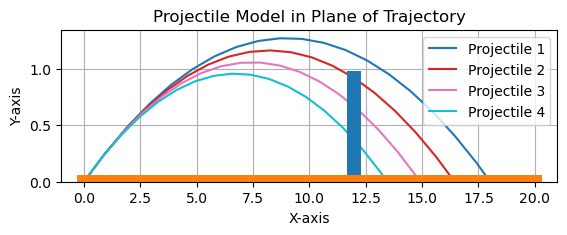

In [52]:
projectile1 = ProjectileModel(0,0,20,theta_i,0.05,k = 0.1)
projectile2 = ProjectileModel(0,0,19,theta_i,0.05,k = 0.1)
projectile3 = ProjectileModel(0,0,18,theta_i,0.05,k = 0.1)
projectile4 = ProjectileModel(0,0,17,theta_i,0.05,k = 0.1)


plotter = ProjectilePlotter()
plotter.add_projectile(projectile1)
plotter.add_projectile(projectile2)
plotter.add_projectile(projectile3)
plotter.add_projectile(projectile4)


plotter.plot_projectiles_layered()